In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('metadata.csv', index_col=0)

df.head(5)

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [22]:
df.columns

Index(['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'sex', 'localization'], dtype='object')

# Data Balancing

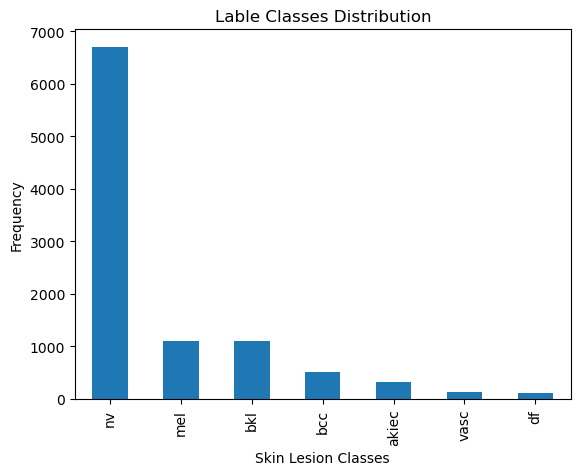

In [25]:
#visualize the lable classes distribution to see if the data is balanced
df['dx'].value_counts().plot(kind='bar')

plt.xlabel('Skin Lesion Classes')
plt.ylabel('Frequency')
plt.title('Lable Classes Distribution')

plt.show()

Conclusion: the data is very imbalanced, melanocytic nevi (nv) is the prevalent lesion type.

The undersampling of data will be done to make the data set more balanced: 
The nv entry count will be reduced to the second most popular lesion count (melanoma (mel))

In [27]:
class_counts = df['dx'].value_counts()
class_counts

dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64

In [29]:
most_common = class_counts.index[0]
second_common_count = class_counts.iloc[1]
print(f'Most common lesion class: {most_common} ')
print(f'Second most common lesion class (mel) count: {second_common_count} ')

Most common lesion class: nv 
Second most common lesion class (mel) count: 1113 


In [31]:
# randomly sample the most frequent class
df_balanced = pd.concat([
    df[df['dx'] == most_common].sample(n=second_common_count, random_state=42),
    df[df['dx'] != most_common]
])

In [33]:
df_balanced

,lesion_id,image_id,dx,dx_type,age,sex,localization
4163,HAM_0003697,ISIC_0025438,nv,follow_up,40.0,male,back
8687,HAM_0000217,ISIC_0029881,nv,histo,40.0,male,chest
3221,HAM_0003344,ISIC_0026399,nv,follow_up,35.0,female,abdomen
8752,HAM_0006028,ISIC_0032189,nv,histo,40.0,male,chest
5811,HAM_0000162,ISIC_0026609,nv,follow_up,40.0,female,back
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


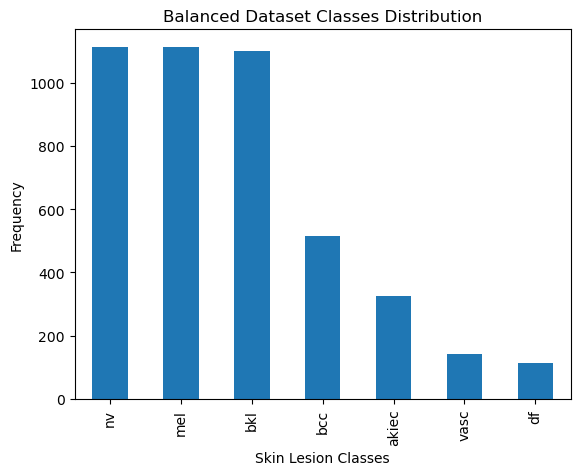

In [35]:
#visualize the lable classes distribution of balanced data set to see if the data is balanced
df_balanced['dx'].value_counts().plot(kind='bar')

plt.xlabel('Skin Lesion Classes')
plt.ylabel('Frequency')
plt.title('Balanced Dataset Classes Distribution')

plt.show()

In [37]:
df_balanced['dx'].value_counts()

dx
nv       1113
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64

# Data Preprocessing

In [39]:
#check for missing values
print(df_balanced.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4423 entries, 4163 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     4423 non-null   object 
 1   image_id      4423 non-null   object 
 2   dx            4423 non-null   object 
 3   dx_type       4423 non-null   object 
 4   age           4403 non-null   float64
 5   sex           4423 non-null   object 
 6   localization  4423 non-null   object 
dtypes: float64(1), object(6)
memory usage: 276.4+ KB
None


In [41]:
#one hot encoding for sex and localization 
df_balanced = pd.get_dummies(df_balanced, columns=['sex', 'localization', 'dx_type'])

#scale age between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_balanced['age'] = scaler.fit_transform(df_balanced[['age']])

In [42]:
#adding a column with image paths to metadata
df_balanced['image_path'] = '/Users/annacivcisa/Desktop/ML_Synth/Skin_Cancer_Project/HAM10000_images/' + df['image_id'] + '.jpg'

In [43]:
df_balanced.head(5)

,lesion_id,image_id,dx,age,sex_female,sex_male,sex_unknown,localization_abdomen,localization_back,localization_chest,...,localization_neck,localization_scalp,localization_trunk,localization_unknown,localization_upper extremity,dx_type_confocal,dx_type_consensus,dx_type_follow_up,dx_type_histo,image_path
4163,HAM_0003697,ISIC_0025438,nv,0.470588,False,True,False,False,True,False,...,False,False,False,False,False,False,False,True,False,/Users/annacivcisa/Desktop/ML_Synth/Skin_Cance...
8687,HAM_0000217,ISIC_0029881,nv,0.470588,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,True,/Users/annacivcisa/Desktop/ML_Synth/Skin_Cance...
3221,HAM_0003344,ISIC_0026399,nv,0.411765,True,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,/Users/annacivcisa/Desktop/ML_Synth/Skin_Cance...
8752,HAM_0006028,ISIC_0032189,nv,0.470588,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,True,/Users/annacivcisa/Desktop/ML_Synth/Skin_Cance...
5811,HAM_0000162,ISIC_0026609,nv,0.470588,True,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,/Users/annacivcisa/Desktop/ML_Synth/Skin_Cance...


In [47]:
df_balanced.to_csv('metadata_processed.csv')